# Análise de Vendas
Este notebook contém análises dos dados de vendas, produtos e clientes da loja.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from classes.classdatabasemanager import DatabaseManager
from utils.logger_utils import logging

# classe DatabaseManager para poder acedar as tabelas
db_manager = DatabaseManager()

# tabelas carregadas em df
df_produtos = db_manager.fetch_data_to_df("SELECT * FROM produtos;")
df_clientes = db_manager.fetch_data_to_df("SELECT * FROM clientes;")
df_vendas = db_manager.fetch_data_to_df("SELECT * FROM vendas;")

# mostrar os primeiros 5 registos
display(df_produtos.head())
display(df_clientes.head())
display(df_vendas.head())


ModuleNotFoundError: No module named 'classes'

In [ ]:
#validar colunas
print(df_produtos.columns)
print(df_vendas.columns)
print(df_clientes.columns)

#validar quantas linhas a tabela tem
print(df_produtos.shape)
print(df_vendas.shape)
print(df_clientes.shape)

#valida dados nulos
print(df_produtos.isnull().sum())
print(df_vendas.isnull().sum())
print(df_clientes.isnull().sum())



Index(['id', 'nome', 'preco', 'categoria'], dtype='object')
Index(['id', 'id_produto', 'id_cliente', 'id_loja', 'quantidade', 'data'], dtype='object')
Index(['id', 'nome', 'email', 'id_loja'], dtype='object')
(10, 4)
(300, 6)
(100, 4)
id           0
nome         0
preco        0
categoria    0
dtype: int64
id            0
id_produto    0
id_cliente    0
id_loja       0
quantidade    0
data          0
dtype: int64
id         0
nome       0
email      0
id_loja    0
dtype: int64


## Análise 1: Produtos Mais Vendidos
Nesta seção, vamos identificar quais produtos tiveram o maior volume de vendas.


In [ ]:
# juntar a tabela vendas pelo id produto com a tabela produtos pelo id
df_merged = df_vendas.merge(df_produtos, left_on="id_produto", right_on="id")

# Calcular total vendido por produto
produtos_mais_vendidos = df_merged.groupby("nome")["quantidade"].sum().sort_values(ascending=False).reset_index()

#tornar a tabela em uma df
produtos_mais_vendidos_df=produtos_mais_vendidos.reset_index()

# Exibir os 10 produtos mais vendidos
display(produtos_mais_vendidos_df.head(10))

,index,nome,quantidade
0,0,Processador AMD Ryzen 9,121
1,1,Monitor LG UltraGear,101
2,2,SSD NVMe Samsung 1TB,101
3,3,Teclado Mecânico HyperX,100
4,4,Placa Gráfica RTX 3080,95
5,5,MacBook Pro 16,92
6,6,Portátil Dell XPS 13,86
7,7,Memória RAM Corsair 16GB,83
8,8,Rato Logitech MX Master,73
9,9,Fonte Corsair 750W,64


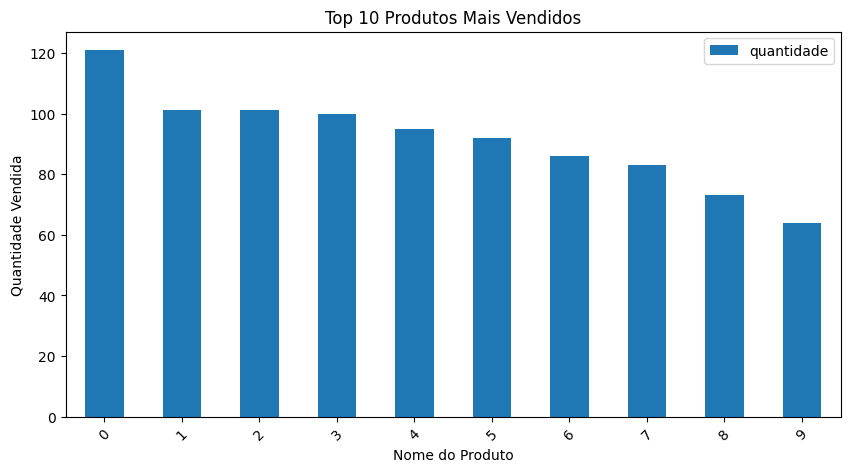

In [ ]:
# Criar gráfico de barras
from utils.funcoes import criar_graficos_matplotlib_pyplot, guardar_analise_csv
criar_graficos_matplotlib_pyplot(produtos_mais_vendidos, "Top 10 Produtos Mais Vendidos", "Nome do Produto", "Quantidade Vendida")


In [ ]:
#guardar ficheiro top10
guardar_analise_csv(produtos_mais_vendidos_df, "top10_produtos")
